## Graphical Models and Expectation-Maximization (II)

#### *22 November 2019*
#### *DATA 1010*

In [1]:
using Distributions, Plots, StatsBase, OffsetArrays
gr(legend = :false, fontfamily = "Palatino");

*Introduction*. Last time we talked about Expectation-Maximization in the context of Gaussian mixture models. With that concrete example in mind, we will discuss the general EM algorithm for Bayes net inference. 

Consider a Bayesian network for which some of the random variables are observed, while others are hidden. Suppose that the conditional distributions in the network are specified in some parametric way. We will look for parameters which maximize the likelihood of the model with respect to the observed data as follows, beginning with an arbitrary initial guess for the parameter values: 

(1) Assuming the current parameter values, we find the conditional distribution of the hidden variables for each observation.  
(2) With respect to that distribution over the hidden variables, we work out the *expected* log likelihood and find the parameters which maximize it.

We repeat these steps to convergence.

---

## Problem 1

Show that this algorithm generalizes the one we came up with last time for the Gaussian mixture model.

*Solution*. 

---

Another common example of a Bayesian network is a **hidden Markov model**. The idea is that we have a Markov chain, but rather than getting to see its values directly, we see some other values which are corruptions of the actual values. 

Consider the following Markov chain Z. Come up with a way to estimate the transition matrix entries from the data.

In [6]:
P = OffsetArray([0.2 0.8
                 1/3 2/3], 0:1, 0:1)

n = 100

function markov_chain(P, n)
    Z = [0]
    for i in 1:n-1
        current_state = Z[end]
        push!(Z, rand() < P[current_state, 0] ? 0 : 1)
    end
    Z
end
Z = markov_chain(P, n)
Z'

1×100 Adjoint{Int64,Array{Int64,1}}:
 0  1  0  0  0  0  1  0  1  1  1  0  1  …  1  1  1  1  1  1  1  1  1  0  0  1

Now suppose that instead of getting to see $Z$, we only see Z plus a standard normal random variable (which is independent for every observation of $Z$): 

In [7]:
X = Z + randn(n)
X'

1×100 Adjoint{Float64,Array{Float64,1}}:
 -1.39693  1.04427  -0.524052  -0.590083  …  -0.0976308  -0.399623  0.0930442

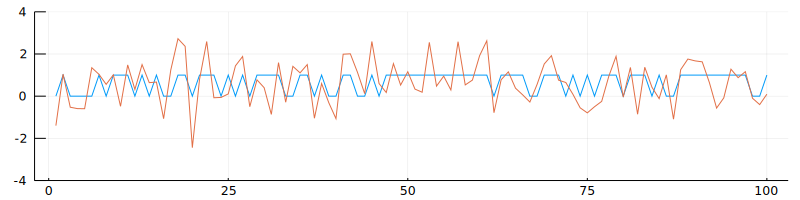

In [9]:
plot(Z, size = (800, 200), ylims = (-4, 4), label = "original signal", titlefont = 10)
plot!(X, size = (800, 200), ylims = (-4, 4), label = "corrupted signal", titlefont = 10)

## Problem 2

Draw a Bayes net diagram illustrating the relationship between $Z_1, Z_2, \ldots, Z_n, X_1, X_2, \ldots, X_n$. 

*Solution*. 

## Problem 3

Consider the following observed values for $X$. 

(a) Try to guess the values of $Z$, and then check your guess by running the cell. Repeat a few times to get a feel for how accurately you can predict $X$ from $Z$. 

In [10]:
Z = markov_chain(P, 4)
X = Z + randn(4)
X'

1×4 Adjoint{Float64,Array{Float64,1}}:
 -0.969794  1.76241  0.539808  -1.68232

In [12]:
Z'

1×4 Adjoint{Int64,Array{Int64,1}}:
 0  0  1  0

(b) In playing the game in part (a), would it be helpful to consider the $X$ values in all positions when guessing the value of $Z_3$? 

(c) Come up with an example (by adjusting the parameters of the model) where accounting for the other $X$ values is clearly important.